<a href="https://colab.research.google.com/github/Dhanshreeshende/OIBSIP-/blob/main/EmailSpamDetectionwithML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dhanshree Shende**

**Data Science internship @oasis infobyte**

# ***TASK 4 - Email spam Detection with Machine Learning***

GITHUB-https://github.com/Dhanshreeshende/OIBSIP-.git

PROBLEM STATEMENT

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!



**Import Libraries**

In [1]:
# Importing essential libraries for data manipulation, machine learning, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For converting the text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# For training/testing, selecting a model, and evaluating model performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Corrected class name

# For evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the Dataset**


In [ ]:
import pandas as pd

# Load the dataset with a different encoding
spam_data = pd.read_csv("/content/spamemails.csv", encoding='ISO-8859-1')

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(spam_data.head())


Dataset Preview:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


**Check DataFrame Structure**


In [ ]:
# Checking the shape and columns of the DataFrame
print("DataFrame Shape:", spam_data.shape)
print("Column Names:", spam_data.columns)

DataFrame Shape: (5572, 2)
Column Names: Index(['label', 'message'], dtype='object')


**Data Cleaning and Preparation**

In [ ]:
# Rename columns based on the actual structure
# Assuming the DataFrame has two columns: 'v1' and 'v2'
spam_data.columns = ['label', 'message']  # Adjust this based on the actual number of columns

# Check for missing values
print("Missing values in each column:")
print(spam_data.isnull().sum())

# Prepare features and labels
X = spam_data['message']  # Features (text messages)
y = spam_data['label']     # Labels (spam/ham)

# Display the cleaned dataset
print("Cleaned Dataset Preview:")
print(spam_data.head())

Missing values in each column:
label      0
message    0
dtype: int64
Cleaned Dataset Preview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


**Text Vectorization**


In [ ]:
# Step 1: Text Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)  # Fit and transform the text data

**Train-Test Split**

In [ ]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 4457
Testing set size: 1115


**Train the Model**

In [ ]:
# Step 3: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model

print("Model training complete.")

Model training complete.


**Make Predictions**

In [ ]:
# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predictions on the test set:")
print(y_pred[:10])

Predictions on the test set:
['ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham']


**Evaluate the Model**

Model Accuracy: 97.67%
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



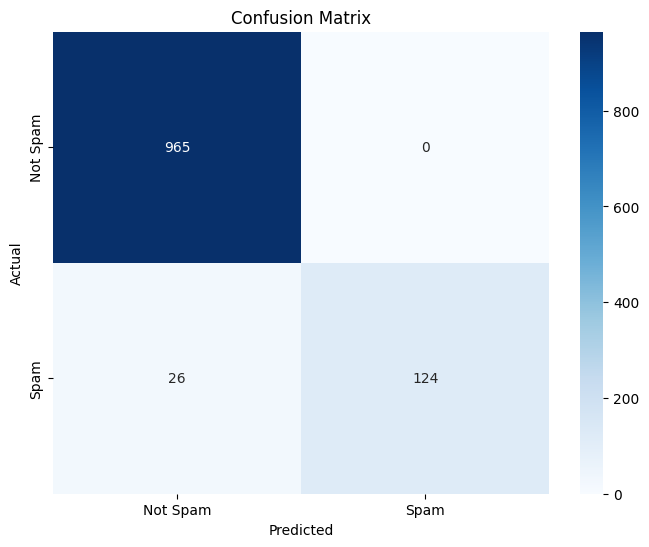

In [ ]:
# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**THE TASK IS COMPLETED SUCCESFULLY**